In [ ]:
# installing libraries

! pip install pandas
! pip install seaborn
! pip install imbalanced-learn

In [64]:
# importing all the nessesary tools

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN 


## First csv

In [7]:
# converting csv file to pandas dataframe

customer_data = pd.read_csv("./data/customer_data.csv")
customer_data.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [8]:
# amount of Nan in each column

print(customer_data.isnull().sum())

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64


In [9]:
# filling out all Nans in "fea_2" with its mean value

customer_data['fea_2'].fillna(customer_data['fea_2'].mean(), inplace=True)

In [10]:
# complete dataset
# key element is 'label' column. it divides all customers into low(0) and high(1) credit risk groups

customer_data.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,48.211113,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1250.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1283.911373,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1310.000000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


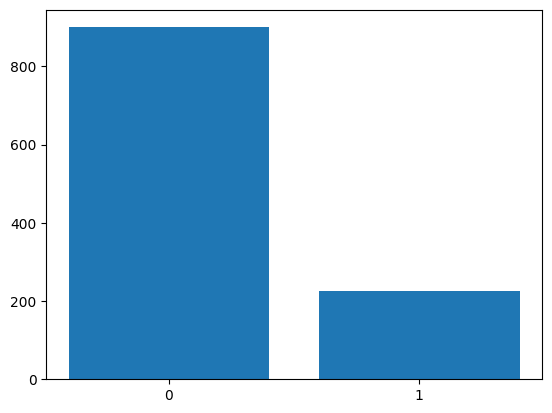

In [22]:
#amount of risk group 1 and 0 are very different

distribution = pd.DataFrame({'Risk group': customer_data["label"].value_counts().index,
                   'Count': customer_data["label"].value_counts().values
                  })
plt.bar(distribution['Risk group'], distribution['Count'], ) 
plt.xticks(distribution.iloc[:, 0])
plt.show()

### using ROS

In [12]:
# using ramdom oversamplefier

ros = RandomOverSampler()
x, y = customer_data.iloc[:, 2:], customer_data.iloc[:, 0]
X, Y = ros.fit_resample(x, y)

In [18]:
Y

0       1
1       0
2       0
3       1
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: label, Length: 1800, dtype: int64

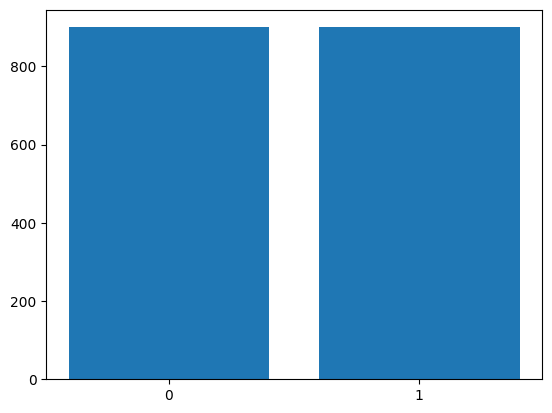

In [21]:
distribution = pd.DataFrame({'Risk group': Y[:].value_counts().index,
                   'Count': Y[:].value_counts().values
                  })
plt.bar(distribution['Risk group'], distribution['Count'], )
plt.xticks(distribution.iloc[:, 0])
plt.show()

In [54]:
# doing a split on test and train datasets

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify=Y)
print(x_train.describe())
print('----------')
print(y_train.describe())

             fea_1        fea_2        fea_3         fea_4        fea_5   
count  1440.000000  1440.000000  1440.000000  1.440000e+03  1440.000000  \
mean      5.546528  1281.793022     2.355556  1.130868e+05     1.940972   
std       1.387145    47.630118     0.867110  8.271457e+04     0.235759   
min       1.000000  1116.500000     1.000000  1.500000e+04     1.000000   
25%       4.000000  1245.500000     1.000000  6.500000e+04     2.000000   
50%       5.000000  1283.911373     3.000000  9.500000e+04     2.000000   
75%       7.000000  1307.000000     3.000000  1.310000e+05     2.000000   
max       7.000000  1481.000000     3.000000  1.200000e+06     2.000000   

             fea_6        fea_7        fea_8        fea_9         fea_10   
count  1440.000000  1440.000000  1440.000000  1440.000000    1440.000000  \
mean     10.877778     4.719444   100.576389     4.184028  169276.416667   
std       2.613177     2.977639    12.073023     0.864010  152998.888228   
min       3.000000  

In [55]:
# adding stratify parameter helps keeping ratio of low to high credit risk groups same as in the dataset

print('dataset mean:', customer_data['label'].mean())
print('train set mean:', y_train.mean())
print('test set mean:', y_test.mean())

dataset mean: 0.2
train set mean: 0.5
test set mean: 0.5


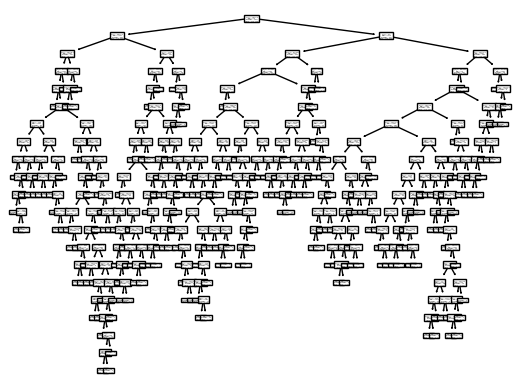

In [56]:
# training a decision tree model

classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
plot_tree(classifier)
plt.show()

In [57]:
# predicting y_test values

y_pred = classifier.predict(x_test)

In [58]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[140  40]
 [  4 176]]
              precision    recall  f1-score   support

           0       0.97      0.78      0.86       180
           1       0.81      0.98      0.89       180

    accuracy                           0.88       360
   macro avg       0.89      0.88      0.88       360
weighted avg       0.89      0.88      0.88       360



In [59]:
# drawing confusion matrix

def plot_cmatrix(test, pred):
    cmat = confusion_matrix(test, pred)
    fig = plt.figure(figsize=(3, 3))
    plt.matshow(cmat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(2))
    plt.xticks(range(2))
    plt.colorbar()
    plt.xlabel('Predicted risk')
    plt.ylabel('Actual risk')

    for i in range(2):
        for j in range(2):
            plt.text(i - 0.1, j+0.05, str(cmat[j, i]), color='tab:red')

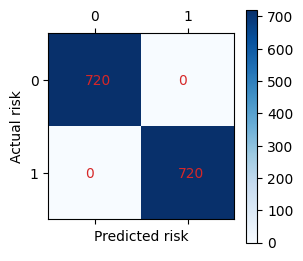

In [60]:
# train confusion matrix

plot_cmatrix(y_train, classifier.predict(x_train))

0.7849162011173184


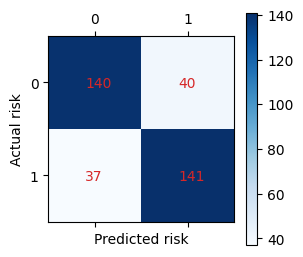

In [84]:
# test confusion matrix
print(classifier.score(x_test, y_test))
plot_cmatrix(y_test, classifier.predict(x_test))

In [63]:
print(classifier.score(x_test, y_test))

0.8777777777777778


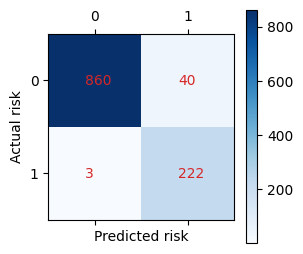

In [62]:
# dataset confusion matrix

plot_cmatrix(customer_data.iloc[:, 0], classifier.predict(customer_data.iloc[:, 2:]))

In [44]:
# accuracy score
print(classifier.score(customer_data.iloc[:, 2:], customer_data.iloc[:, 0]))

0.9537777777777777


### using ADASYN

In [66]:
# using ramdom oversamplefier

adasyn = ADASYN()
x, y = customer_data.iloc[:, 2:], customer_data.iloc[:, 0]
X, Y = adasyn.fit_resample(x, y)

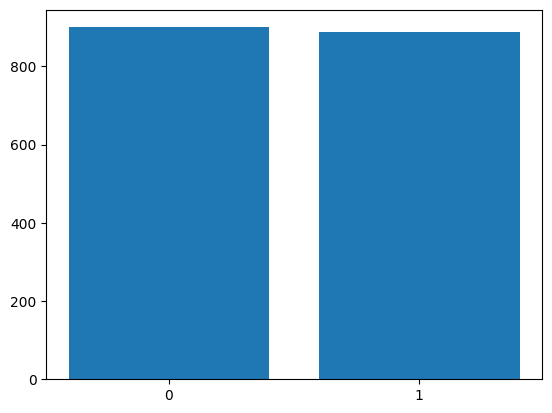

In [72]:
distribution = pd.DataFrame({'Risk group': Y[:].value_counts().index,
                   'Count': Y[:].value_counts().values
                  })
plt.bar(distribution['Risk group'], distribution['Count'], )
plt.xticks(distribution.iloc[:, 0])
plt.show()

In [73]:
# doing a split on test and train datasets

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify=Y)
print(x_train.describe())
print('----------')
print(y_train.describe())

             fea_1        fea_2        fea_3         fea_4        fea_5   
count  1431.000000  1431.000000  1431.000000  1.431000e+03  1431.000000  \
mean      5.473795  1281.088432     2.264151  1.150855e+05     1.903564   
std       1.307527    45.921576     0.856955  8.329626e+04     0.295292   
min       1.000000  1116.500000     1.000000  1.500000e+04     1.000000   
25%       4.000000  1248.764471     1.000000  6.800000e+04     2.000000   
50%       5.000000  1283.282831     3.000000  9.800000e+04     2.000000   
75%       7.000000  1307.000000     3.000000  1.330000e+05     2.000000   
max       7.000000  1481.000000     3.000000  1.200000e+06     2.000000   

             fea_6        fea_7        fea_8        fea_9         fea_10   
count  1431.000000  1431.000000  1431.000000  1431.000000    1431.000000  \
mean     10.805031     4.770091   100.178197     4.088050  162820.595388   
std       2.496516     2.697494    11.361004     0.854812  150214.734096   
min       3.000000  

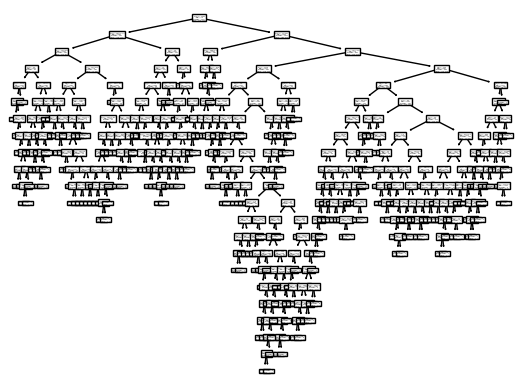

In [74]:
# training a decision tree model

classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
plot_tree(classifier)
plt.show()

In [75]:
y_pred = classifier.predict(x_test)

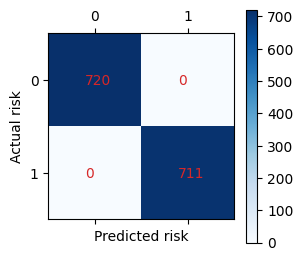

In [76]:
plot_cmatrix(y_train, classifier.predict(x_train))

0.7849162011173184


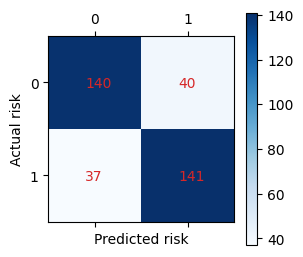

In [83]:
print(classifier.score(x_test, y_test))
plot_cmatrix(y_test, classifier.predict(x_test))


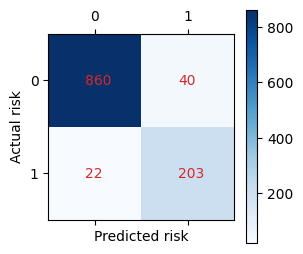

In [80]:
plot_cmatrix(customer_data.iloc[:, 0], classifier.predict(customer_data.iloc[:, 2:]))

In [81]:
print(classifier.score(customer_data.iloc[:, 2:], customer_data.iloc[:, 0]))

0.9448888888888889
